Investigate the following titanic data samples in the following ways:

1. Check by head, tail, sample, info and then what observations can you get?

2. Do a Statistical Summary by extracting information obtained from your observations?

3. Check if there are duplicates and how to handle them?

4. Check if there is a missing value, what percentage if any, and how to handle it?

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [7]:
# Head, Tail, Sample, and Info Inspection
print("Head:")
print(df.head())

print("\nTail:")
print(df.tail())

print("\nSample:")
print(df.sample(5))

print("\nInfo:")
df.info()

Head:
   survived                                             name     sex      age
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000
1         1                   Allison, Master. Hudson Trevor    male   0.9167
2         0                     Allison, Miss. Helen Loraine  female   2.0000
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000

Tail:
     survived                                     name     sex   age
495         1  Mallet, Mrs. Albert (Antoinette Magnin)  female  24.0
496         0        Mangiavacchi, Mr. Serafino Emilio    male   NaN
497         0               Matthews, Mr. William John    male  30.0
498         0                Maybery, Mr. Frank Hubert    male  40.0
499         0                McCrae, Mr. Arthur Gordon    male  32.0

Sample:
     survived                                               name     sex   age
115         0    

Observation Results

The dataset contains 500 Titanic passengers.

There are 4 columns: survived, name, gender, and age.

The age column has missing values (only 451 out of 500 are filled).

In [8]:
# grouping for categorical and numerical type data
categoricals = ['name', 'sex']
numericals = ['survived', 'age']

In [9]:
# To get a summary of the statistics
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
          survived                            name   sex         age
count   500.000000                             500   500  451.000000
unique         NaN                             499     2         NaN
top            NaN  Eustis, Miss. Elizabeth Mussey  male         NaN
freq           NaN                               2   288         NaN
mean      0.540000                             NaN   NaN   35.917775
std       0.498897                             NaN   NaN   14.766454
min       0.000000                             NaN   NaN    0.666700
25%       0.000000                             NaN   NaN   24.000000
50%       1.000000                             NaN   NaN   35.000000
75%       1.000000                             NaN   NaN   47.000000
max       1.000000                             NaN   NaN   80.000000


Observation Results

For numerics: mean, min, max, quartile

For categorical: number of unique values, mode (most frequencies)

From here we can see the distribution of values such as age, passenger class, survival status, etc.

In [10]:
# Check the amount of duplicate data
duplikat = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplikat}")


Jumlah data duplikat: 1


In [11]:
# Remove duplicates if any
df = df.drop_duplicates()

Observation Results

Check if there are exact (duplicate) rows.

If found, it will be removed to ensure that the analysis is not biased.

In [12]:
# Check the Missing Value and Percentage
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})
print("\nMissing Value Summary:")
print(missing_summary)


Missing Value Summary:
          Missing Values  Percentage (%)
survived               0        0.000000
name                   0        0.000000
sex                    0        0.000000
age                   49        9.819639


Observation Results

Provides the number and percentage of missing values in each column.

For example, the age column often has a lot of missing values (about 20%+ in the original Titanic dataset).

This is important to determine whether it needs to be filled, discarded, or imputed.

In [13]:
# Example: Handling missing value in the 'age' column with average imputation
if 'age' in df.columns:
    mean_age = df['age'].mean()
    df['age'].fillna(mean_age, inplace=True)
    print("\nMissing value pada kolom 'age' sudah diisi dengan rata-rata.")


Missing value pada kolom 'age' sudah diisi dengan rata-rata.


<ipython-input-13-7c361f401e15>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


Observation Results

Fill in the blank value in the age column with the average age.

This is a simple but often used method so that we can still do analysis without deleting data.

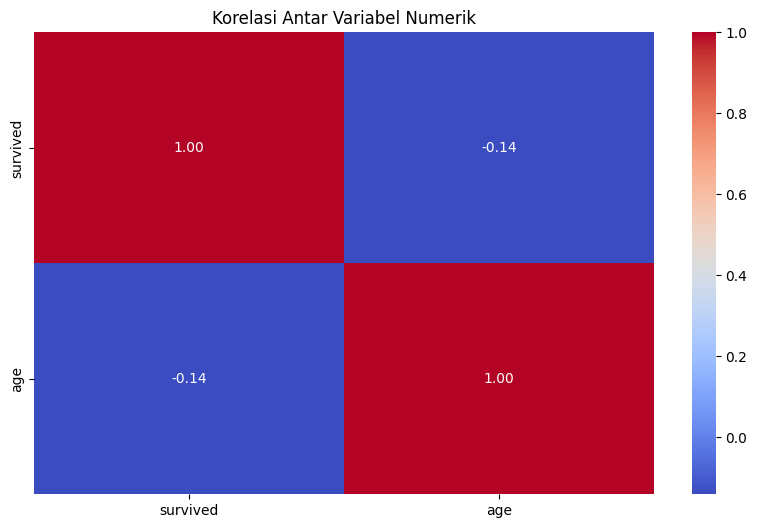

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

Observation Results

There was a weak negative correlation between 'age' and 'survived' of -0.15.
This indicates a slight influence of age on the likelihood of survival, although it is not significant.

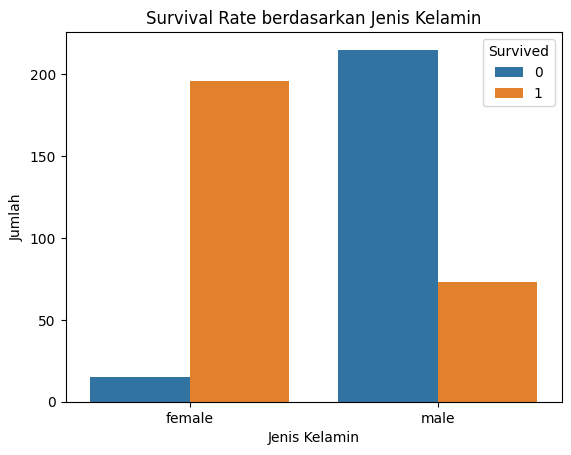

In [15]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival Rate berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title="Survived")
plt.show()

Observation Results

1. Women have a much higher survival rate than men. Most of the females were on the survivord bar = 1, meaning they survived more. In contrast, most males were on the survivord = 0 bar, which means they were more likely to not survive.

2. This pattern shows the influence of social policies during evacuation, such as "women and children first". In the tragedy of the Titanic, there was indeed a tendency to save women first. This is clearly reflected in the graph.

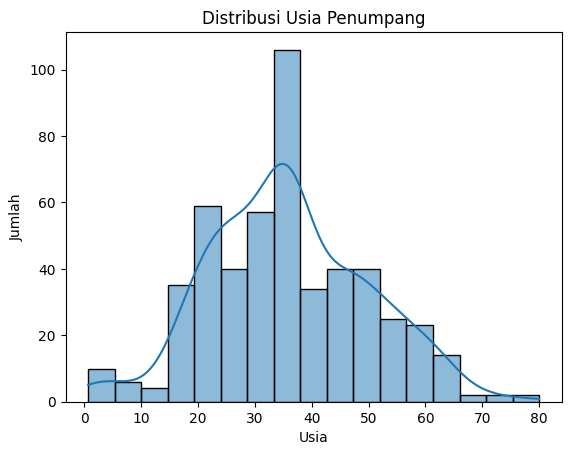

In [16]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Distribusi Usia Penumpang")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

Observation Results

1. Most of the passengers are in the age range of young to early adulthood (about 20–40 years). The peak of the histogram is seen at about 20–30 years of age.This shows that the most passengers are in the productive age group.

2. The age distribution is not entirely symmetrical. The histogram looks slightly right-skewed, meaning there are fewer elderly passengers (> 60 years old). However, it is still seen quite a lot of children and adolescents, although the number is much smaller than the group of young adults.